In [12]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Removing four digits from the dataset
train_filter = np.where((y_train == 0 ) | (y_train == 1) | (y_train == 2) | (y_train == 3) | (y_train == 8)| (y_train == 9))
test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2) | (y_test == 3) | (y_test == 8) | (y_test == 9))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

print('run')


run


1


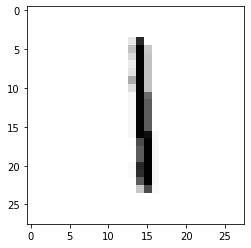

In [13]:
import matplotlib.pyplot as plt
image_index = 1190
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [14]:
x_test.shape

(6140, 28, 28)

In [15]:
x_train.shape

(36554, 28, 28)

In [16]:
# transforming x_train and x_test into 4D arrays
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# converting the variables to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# RGB code normalizing
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (36554, 28, 28, 1)
Number of images in x_train 36554
Number of images in x_test 6140


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# CNN MODEL AND LAYERS

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=1)

Epoch 1/1
36554/36554 [==============================] - 44s 1ms/step - loss: 0.1582 - acc: 0.9535


In [19]:
model.evaluate(x_test, y_test)

6140/6140 [==============================] - 3s 535us/step


[0.05905197124916101, 0.9817589576547231]

NameError: name 'img_rows' is not defined

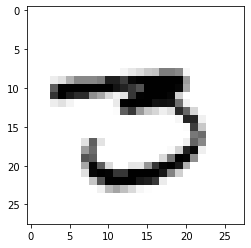

In [20]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [21]:
model_json = model.to_json()
with open("model_alldata.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_alldata.h5")
print("Saved model to disk")

Saved model to disk
